In [42]:
import pandas as pd
import numpy as np

import plotnine as p9

In [43]:
searches_iter = pd.read_csv(
            "searches.csv.bz2", 
            compression='bz2',
            engine='c',
            chunksize=10000,
            usecols=["Date", 'Destination'],
            parse_dates=["Date"],
            delimiter="^")

In [44]:
searches_per_date = pd.DataFrame({'Date': [], 'Destination': [], 'Count': []})
searches_per_date

,Date,Destination,Count


In [45]:
airports = ["MAD", "BCN", "AGP"]

for searches_chunk in searches_iter:
    grp = (
        searches_chunk
        .dropna()
        .query('Destination in @airports')
        .groupby(['Date', 'Destination'], as_index=False)
        .agg(Count = ('Date','count'))
    )

    searches_per_date = searches_per_date.append(grp, ignore_index=True)

In [46]:
searches_per_date.to_csv('searches_per_date.csv')

In [68]:
(
    searches_per_date
    .assign(
        Month=searches_per_date['Date'].astype('datetime64').dt.month,
        Count=searches_per_date['Count'].astype('int')
    )
    .pivot_table(
        index="Month",
        columns="Destination",
        aggfunc='sum',
        values="Count"
    )
)

Destination,AGP,BCN,MAD
Month,,,
1,9633,29469,24258
2,8379,28329,22800
3,10659,30552,24681
4,8265,31236,25251
5,10830,28728,26334
6,7923,26505,22800
7,8892,29241,22971
8,7866,27075,21831
9,8151,23427,21147


In [47]:
searches_per_month = (
    searches_per_date
    .assign(
        Month=searches_per_date['Date'].astype('datetime64').dt.month,
        Count=searches_per_date['Count'].astype('int')
    )
    .groupby(['Month', 'Destination'], as_index=False)
    .agg(Searches = ('Count', np.sum))
)

In [48]:
searches_per_month.head()

,Month,Destination,Searches
0,1,AGP,9633
1,1,BCN,29469
2,1,MAD,24258
3,2,AGP,8379
4,2,BCN,28329


In [49]:
searches_per_month.to_csv('searches_per_month.csv')

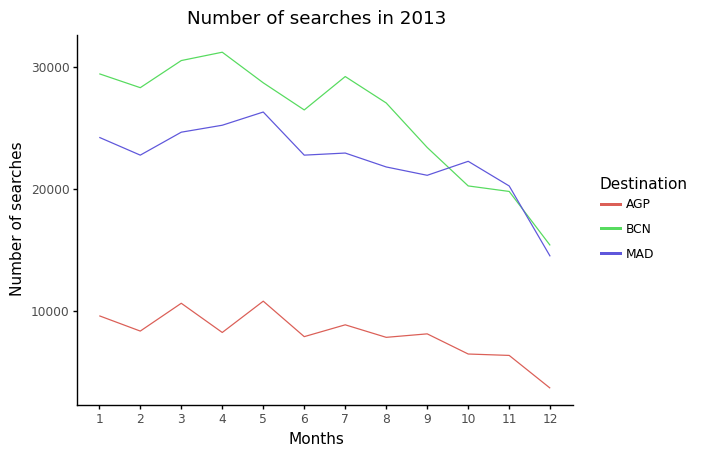

<ggplot: (153008912565)>

In [62]:
(
    p9.ggplot(searches_per_month, p9.aes(x='Month', y='Searches', color='Destination'))
    + p9.geom_line()
    + p9.xlab("Months")
    + p9.ylab("Number of searches")
    + p9.ggtitle("Number of searches in 2013")
    + p9.scale_x_continuous(breaks=range(1,13))
    + p9.theme_classic()
)